In [1]:
from helpers import *
import matplotlib.pyplot as plt
import os, glob, cv2, random
import seaborn as sns
import pandas as pd
import numpy as np

# Preview

In [2]:
base_path = 'dataset'

Xr= np.load(os.path.join(base_path, 'Xr.npy'))
Xl= np.load(os.path.join(base_path, 'Xl.npy'))
yr= np.load(os.path.join(base_path, 'yr.npy'))
yl= np.load(os.path.join(base_path, 'yl.npy'))
print(Xr.shape)

IMG_HEIGHT = 26
IMG_WIDTH = 34

(23, 26, 34, 1)


(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)
(26, 34, 1)


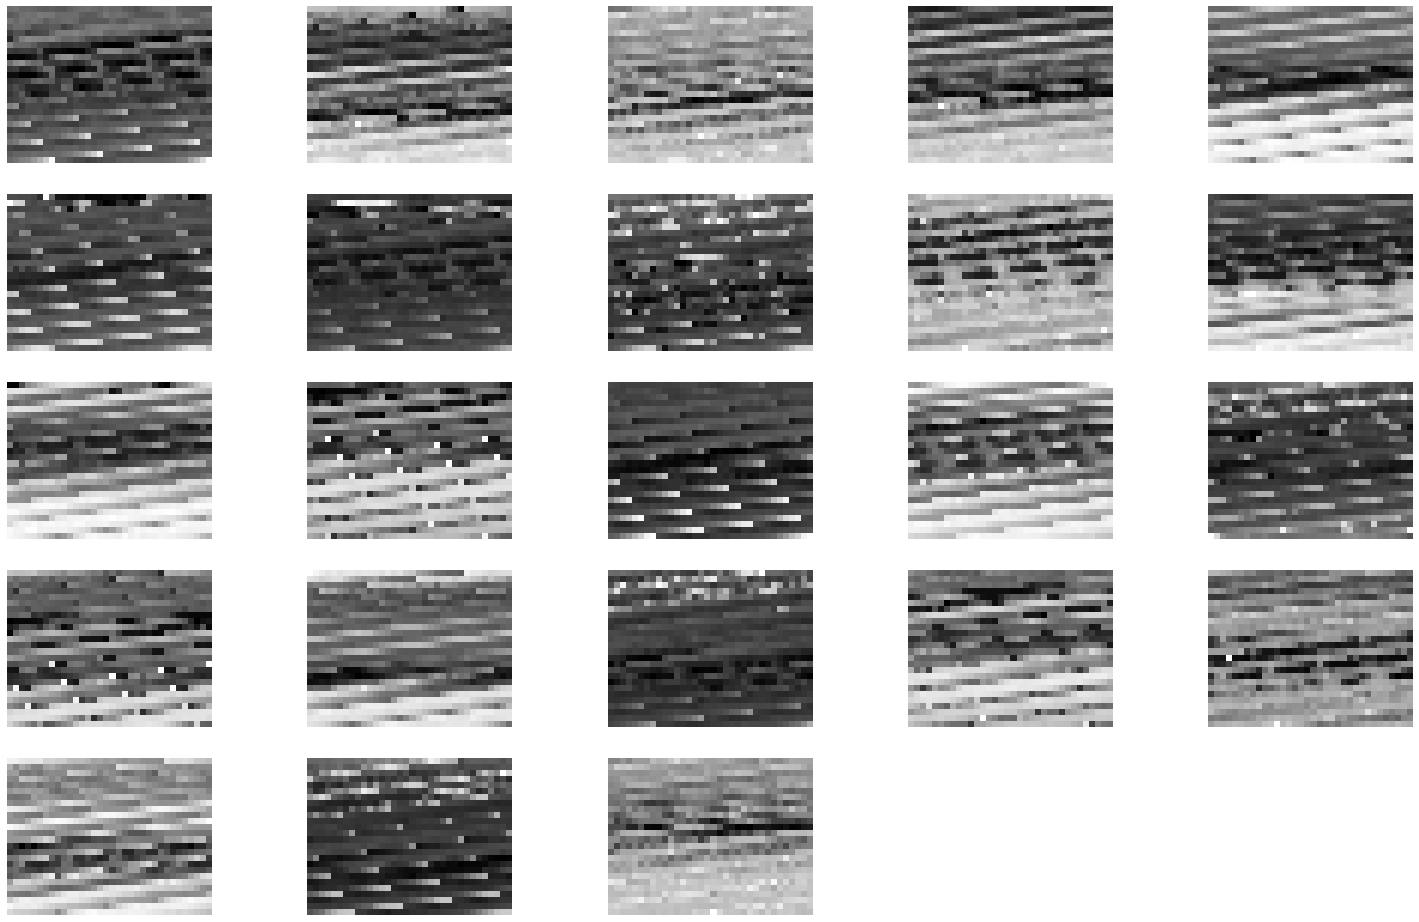

In [17]:
# 내가 봤을때 오른쪽 눈
plt.figure(figsize=(26, 34))
for i in range(0,Xr.shape[0]):
    plt.subplot(10, 5, i+1)
    plt.axis('off')
    plt.imshow(Xr[i].reshape((IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
    print(Xr[i].shape)

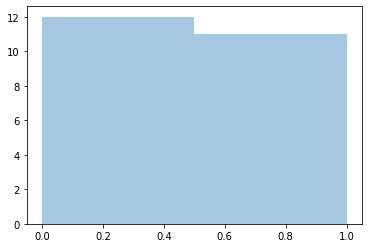

In [4]:
sns.distplot(yr, kde=False)

# Preprocessing

In [5]:
nr_total = len(Xr)
nl_total = len(Xl)
Xr_result = np.empty((nr_total, IMG_HEIGHT, IMG_WIDTH, 1))
Xl_result = np.empty((nl_total, IMG_HEIGHT, IMG_WIDTH, 1))

for i, x in enumerate(Xr):
    img = x.reshape((IMG_HEIGHT, IMG_WIDTH, 1))
    Xr_result[i] = img
    
for i, x in enumerate(Xl):
    img = x.reshape((IMG_HEIGHT, IMG_WIDTH, 1))
    Xl_result[i] = img

In [6]:
from sklearn.model_selection import train_test_split

xr_train, xr_val, yr_train, yr_val = train_test_split(Xr_result, yr, test_size=0.2)
xl_train, xl_val, yl_train, yl_val = train_test_split(Xl_result, yl, test_size=0.2)

print(xr_train.shape, yr_train.shape)
print(xl_val.shape, yl_val.shape)

print(yr_train)
print(yr_val)

np.save('dataset/xr_train.npy', xr_train)
np.save('dataset/yr_train.npy', yr_train)
np.save('dataset/xr_val.npy', xr_val)
np.save('dataset/yr_val.npy', yr_val)

np.save('dataset/xl_train.npy', xl_train)
np.save('dataset/yl_train.npy', yl_train)
np.save('dataset/xl_val.npy', xl_val)
np.save('dataset/yl_val.npy', yl_val)

(18, 26, 34, 1) (18, 1)
(5, 26, 34, 1) (5, 1)
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
[[1.]
 [1.]
 [0.]
 [1.]
 [0.]]


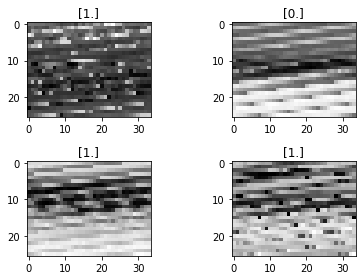

In [7]:
plt.subplot(2, 2, 1)
plt.title(str(yr_train[0]))
plt.imshow(xr_train[0].reshape((IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.subplot(2, 2, 2)
plt.title(str(yr_val[4]))
plt.imshow(xr_val[4].reshape((IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.subplot(2, 2, 3)
plt.title(str(yl_train[0]))
plt.imshow(xl_train[0].reshape((IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.subplot(2, 2, 4)
plt.title(str(yl_val[3]))
plt.imshow(xl_val[3].reshape((IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.tight_layout()

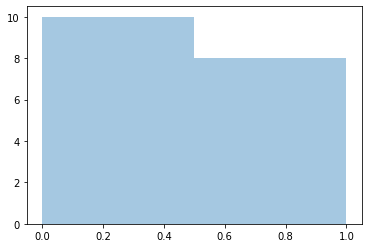

In [8]:
sns.distplot(yr_train, kde=False)

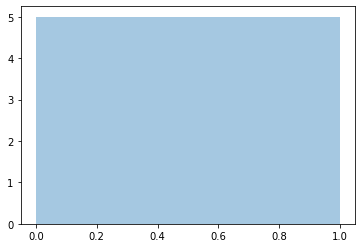

In [9]:
sns.distplot(yr_val, kde=False)